# Analyzing Ford GoBike

**Ahmad Abu Saida**

# Introduction

Ford GoBike is a regional public bicycle sharing system in the San Francisco Bay Area, California. Beginning operation in August 2013 as Bay Area Bike Share, the Ford GoBike system currently has over 2,600 bicycles in 262 stations across San Francisco, East Bay and San Jose. On June 28, 2017, the system officially launched as Ford GoBike in a partnership with Ford Motor Company. 

Ford GoBike, like other bike share systems, consists of a fleet of specially designed, sturdy and durable bikes that are locked into a network of docking stations throughout the city. The bikes can be unlocked from one station and returned to any other station in the system, making them ideal for one-way trips. The bikes are available for use 24 hours/day, 7 days/week, 365 days/year and riders have access to all bikes in the network when they become a member or purchase a pass.

# Preliminary Wrangling
This document explores the Ford GoBike's trip data for public containing approximately 1,850,000 bike rides from FY2018.

**Part I - Gathering Data**

In [320]:
# import all packages and set plots to be embedded inline
from requests import get
from os import path, getcwd, makedirs, listdir 
from io import BytesIO
from zipfile import ZipFile
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.ticker as tick
import seaborn as sns
import datetime
import math
import calendar
import warnings
warnings.filterwarnings('ignore')
from IPython.display import Image
%matplotlib inline

In [321]:
# download the dataset with pandas
folder_name_of_csvs = 'trip_data_files'

In [322]:
# Combine All Locally Saved CSVs into One DataFrame
list_csvs = []
for file_name in listdir(folder_name_of_csvs):
    list_csvs.append(pd.read_csv(folder_name_of_csvs+'/'+file_name))
df = pd.concat(list_csvs)

In [323]:
df.to_csv('data.csv')

**Part II - Assessing Data**

In [324]:
# Visually check first 5 records
df.head()

,Unnamed: 0,bike_id,bike_share_for_all_trip,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,member_birth_year,member_gender,start_station_id,start_station_latitude,start_station_longitude,start_station_name,start_time,user_type
0,NaN,1035,No,598,114.0,37.764478,-122.402570,Rhode Island St at 17th St,2018-03-01 00:09:45.1870,1988.0,Male,284.0,37.784872,-122.400876,Yerba Buena Center for the Arts (Howard St at ...,2018-02-28 23:59:47.0970,Subscriber
1,NaN,1673,No,943,324.0,37.788300,-122.408531,Union Square (Powell St at Post St),2018-02-28 23:36:59.9740,1987.0,Male,6.0,37.804770,-122.403234,The Embarcadero at Sansome St,2018-02-28 23:21:16.4950,Customer
2,NaN,3498,No,18587,15.0,37.795392,-122.394203,San Francisco Ferry Building (Harry Bridges Pl...,2018-02-28 23:30:42.9250,1986.0,Female,93.0,37.770407,-122.391198,4th St at Mission Bay Blvd S,2018-02-28 18:20:55.1900,Customer
3,NaN,3129,No,18558,15.0,37.795392,-122.394203,San Francisco Ferry Building (Harry Bridges Pl...,2018-02-28 23:30:12.4500,1981.0,Male,93.0,37.770407,-122.391198,4th St at Mission Bay Blvd S,2018-02-28 18:20:53.6210,Customer
4,NaN,1839,Yes,885,297.0,37.322980,-121.887931,Locust St at Grant St,2018-02-28 23:29:58.6080,1976.0,Female,308.0,37.336802,-121.894090,San Pedro Square,2018-02-28 23:15:12.8580,Subscriber


In [325]:
# Visually check 50 random records
df.sample(50)

,Unnamed: 0,bike_id,bike_share_for_all_trip,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,member_birth_year,member_gender,start_station_id,start_station_latitude,start_station_longitude,start_station_name,start_time,user_type
11921,NaN,907,No,3421,317.0,37.333955,-121.877349,San Salvador St at 9th St,2018-06-28 22:17:07.5270,2000.0,Female,317.0,37.333955,-121.877349,San Salvador St at 9th St,2018-06-28 21:20:06.5010,Customer
138542,NaN,2941,No,320,89.0,37.769218,-122.407646,Division St at Potrero Ave,2018-10-10 09:45:16.8280,1985.0,Male,80.0,37.775306,-122.397380,Townsend St at 5th St,2018-10-10 09:39:56.3450,Subscriber
102301,NaN,3756,No,9814,148.0,37.829705,-122.287610,Horton St at 40th St,2018-04-08 19:37:33.9080,NaN,NaN,148.0,37.829705,-122.287610,Horton St at 40th St,2018-04-08 16:53:59.0630,Customer
89151,NaN,3415,No,740,200.0,37.800214,-122.253810,2nd Ave at E 18th St,2018-02-05 17:36:47.7490,1975.0,Female,195.0,37.812314,-122.260779,Bay Pl at Vernon St,2018-02-05 17:24:27.6090,Subscriber
51194,51194.0,1129,NaN,435,180.0,37.812678,-122.268773,Telegraph Ave at 23rd St,2017-12-11 13:43:56.6250,1988.0,Male,197.0,37.808848,-122.249680,El Embarcadero at Grand Ave,2017-12-11 13:36:41.0530,Subscriber
83547,NaN,4041,No,311,80.0,37.775306,-122.397380,Townsend St at 5th St,2018-07-19 09:05:05.5880,1983.0,Female,116.0,37.764802,-122.394771,Mississippi St at 17th St,2018-07-19 08:59:54.0430,Subscriber
17651,NaN,3034,No,126,90.0,37.771058,-122.402717,Townsend St at 7th St,2018-06-28 09:39:12.8650,1976.0,Male,80.0,37.775306,-122.397380,Townsend St at 5th St,2018-06-28 09:37:06.3020,Subscriber
129185,NaN,1121,No,7710,163.0,37.797320,-122.265320,Lake Merritt BART Station,2018-04-01 20:18:16.1770,NaN,NaN,163.0,37.797320,-122.265320,Lake Merritt BART Station,2018-04-01 18:09:45.2070,Customer
5811,NaN,4387,No,975,26.0,37.787290,-122.394380,1st St at Folsom St,2018-09-29 16:28:25.3080,1967.0,Male,15.0,37.795392,-122.394203,San Francisco Ferry Building (Harry Bridges Pl...,2018-09-29 16:12:09.4130,Subscriber
71881,NaN,176,No,630,58.0,37.776619,-122.417385,Market St at 10th St,2018-06-20 14:04:37.6760,1994.0,Female,122.0,37.760299,-122.418892,19th St at Mission St,2018-06-20 13:54:07.1020,Customer


In [326]:
# View info of the dataframe
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2252058 entries, 0 to 201457
Data columns (total 17 columns):
Unnamed: 0                 519700 non-null float64
bike_id                    2252058 non-null int64
bike_share_for_all_trip    1732358 non-null object
duration_sec               2252058 non-null int64
end_station_id             2240479 non-null float64
end_station_latitude       2252058 non-null float64
end_station_longitude      2252058 non-null float64
end_station_name           2240479 non-null object
end_time                   2252058 non-null object
member_birth_year          2079810 non-null float64
member_gender              2080240 non-null object
start_station_id           2240479 non-null float64
start_station_latitude     2252058 non-null float64
start_station_longitude    2252058 non-null float64
start_station_name         2240479 non-null object
start_time                 2252058 non-null object
user_type                  2252058 non-null object
dtypes: float64(

In [327]:
# Check if duplicates exist
df.duplicated().sum()

0

In [328]:
# View descriptive statistics of the dataframe
df.describe()

,Unnamed: 0,bike_id,duration_sec,end_station_id,end_station_latitude,end_station_longitude,member_birth_year,start_station_id,start_station_latitude,start_station_longitude
count,519700.000000,2.252058e+06,2.252058e+06,2.240479e+06,2.252058e+06,2.252058e+06,2.079810e+06,2.240479e+06,2.252058e+06,2.252058e+06
mean,259849.500000,2.101589e+03,9.181335e+02,1.114495e+02,3.776810e+01,-1.223520e+02,1.982467e+03,1.132275e+02,3.776797e+01,-1.223525e+02
std,150024.611786,1.195229e+03,2.686599e+03,9.702559e+01,1.014484e-01,1.556892e-01,1.051074e+01,9.713899e+01,1.015587e-01,1.560933e-01
min,0.000000,1.000000e+01,6.100000e+01,3.000000e+00,3.726331e+01,-1.224737e+02,1.881000e+03,3.000000e+00,3.726331e+01,-1.224737e+02
25%,129924.750000,1.098000e+03,3.580000e+02,2.800000e+01,3.777166e+01,-1.224094e+02,1.977000e+03,3.000000e+01,3.777143e+01,-1.224114e+02
50%,259849.500000,2.131000e+03,5.660000e+02,8.100000e+01,3.778175e+01,-1.223971e+02,1.985000e+03,8.100000e+01,3.778127e+01,-1.223974e+02
75%,389774.250000,3.059000e+03,8.880000e+02,1.790000e+02,3.779539e+01,-1.222948e+02,1.990000e+03,1.800000e+02,3.779539e+01,-1.222948e+02
max,519699.000000,4.466000e+03,8.636900e+04,3.810000e+02,4.551000e+01,-7.357000e+01,2.000000e+03,3.810000e+02,4.551000e+01,-7.357000e+01


**Quality issues**

    -start time and end time are objects not a timestamps
    -user type, gender and bike_share_for_all_trip can be set to category
    -bike id, start_station_id, end_station_id can be set to object
    -member birth year has dates prior to 1900
    -we can calculate the age of the user
    -we can further enhance the dataset with more details about the time like month, day, hour, weekday
    -we can calculate the distance for rides between stations

# Part III - Cleaning Data

In [329]:
# Create copies of original DataFrames
df_clean = df.copy()

**Define**

Set appropriate data types for fields mentioned in the Quality issues

**Code**

In [330]:
# set dates to timestamps
df_clean.start_time = pd.to_datetime(df_clean.start_time)
df_clean.end_time = pd.to_datetime(df_clean.end_time)

In [331]:
# set user type, gender and bike_share_for_all_trip to category
df_clean.user_type = df_clean.user_type.astype('category')
df_clean.member_gender = df_clean.member_gender.astype('category')
df_clean.bike_share_for_all_trip = df_clean.bike_share_for_all_trip.astype('category')

In [332]:
# set bike id, start_station_id, end_station_id to object
df_clean.bike_id = df_clean.bike_id.astype(str)
df_clean.start_station_id = df_clean.bike_id.astype(str)
df_clean.end_station_id = df_clean.bike_id.astype(str)

**Test**

In [333]:
df_clean.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2252058 entries, 0 to 201457
Data columns (total 17 columns):
Unnamed: 0                 519700 non-null float64
bike_id                    2252058 non-null object
bike_share_for_all_trip    1732358 non-null category
duration_sec               2252058 non-null int64
end_station_id             2252058 non-null object
end_station_latitude       2252058 non-null float64
end_station_longitude      2252058 non-null float64
end_station_name           2240479 non-null object
end_time                   2252058 non-null datetime64[ns]
member_birth_year          2079810 non-null float64
member_gender              2080240 non-null category
start_station_id           2252058 non-null object
start_station_latitude     2252058 non-null float64
start_station_longitude    2252058 non-null float64
start_station_name         2240479 non-null object
start_time                 2252058 non-null datetime64[ns]
user_type                  2252058 non-null cate

**Define**

Calculate the age of the member

**Code**

In [334]:
# substract the birth year from the current year
df_clean['member_age'] = 2019-df_clean['member_birth_year']

**Test**

In [335]:
df_clean.head(20)

,Unnamed: 0,bike_id,bike_share_for_all_trip,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,member_birth_year,member_gender,start_station_id,start_station_latitude,start_station_longitude,start_station_name,start_time,user_type,member_age
0,NaN,1035,No,598,1035,37.764478,-122.402570,Rhode Island St at 17th St,2018-03-01 00:09:45.187,1988.0,Male,1035,37.784872,-122.400876,Yerba Buena Center for the Arts (Howard St at ...,2018-02-28 23:59:47.097,Subscriber,31.0
1,NaN,1673,No,943,1673,37.788300,-122.408531,Union Square (Powell St at Post St),2018-02-28 23:36:59.974,1987.0,Male,1673,37.804770,-122.403234,The Embarcadero at Sansome St,2018-02-28 23:21:16.495,Customer,32.0
2,NaN,3498,No,18587,3498,37.795392,-122.394203,San Francisco Ferry Building (Harry Bridges Pl...,2018-02-28 23:30:42.925,1986.0,Female,3498,37.770407,-122.391198,4th St at Mission Bay Blvd S,2018-02-28 18:20:55.190,Customer,33.0
3,NaN,3129,No,18558,3129,37.795392,-122.394203,San Francisco Ferry Building (Harry Bridges Pl...,2018-02-28 23:30:12.450,1981.0,Male,3129,37.770407,-122.391198,4th St at Mission Bay Blvd S,2018-02-28 18:20:53.621,Customer,38.0
4,NaN,1839,Yes,885,1839,37.322980,-121.887931,Locust St at Grant St,2018-02-28 23:29:58.608,1976.0,Female,1839,37.336802,-121.894090,San Pedro Square,2018-02-28 23:15:12.858,Subscriber,43.0
5,NaN,2656,No,921,2656,37.350964,-121.902016,Mission St at 1st St,2018-02-28 23:29:40.437,1997.0,Male,2656,37.329732,-121.901782,San Jose Diridon Station,2018-02-28 23:14:19.170,Customer,22.0
6,NaN,1616,No,277,1616,37.335885,-121.885660,San Fernando St at 4th St,2018-02-28 23:26:27.222,1957.0,Female,1616,37.330165,-121.885831,San Salvador St at 1st St,2018-02-28 23:21:49.274,Subscriber,62.0
7,NaN,144,No,285,144,37.808894,-122.256460,Grand Ave at Perkins St,2018-02-28 23:26:05.405,1990.0,Female,144,37.807813,-122.264496,Snow Park,2018-02-28 23:21:19.631,Subscriber,29.0
8,NaN,3351,No,363,3351,37.839649,-122.271756,Genoa St at 55th St,2018-02-28 23:25:22.274,1975.0,Male,3351,37.828410,-122.266315,MacArthur BART Station,2018-02-28 23:19:18.606,Subscriber,44.0
9,NaN,1699,Yes,226,1699,37.332039,-121.881766,5th St at San Salvador St,2018-02-28 23:19:06.620,1996.0,Male,1699,37.332794,-121.875926,William St at 10th St,2018-02-28 23:15:20.033,Subscriber,23.0


**Define**

Enhance dataset with new date related fields

**Code**

In [336]:
# extract start time month name
df_clean['start_time_month_name']=df_clean['start_time'].dt.strftime('%B')

In [337]:
# extract start time month number
df_clean['start_time_month']=df_clean['start_time'].dt.month.astype(int)

In [338]:
# extract start time weekdays
df_clean['start_time_weekday']=df_clean['start_time'].dt.strftime('%a')

In [339]:
# extract start time day
df_clean['start_time_day']=df_clean['start_time'].dt.day.astype(int)

In [340]:
# extract start time hour
df_clean['start_time_hour']=df_clean['start_time'].dt.hour

**Test**

In [341]:
df_clean.head()

,Unnamed: 0,bike_id,bike_share_for_all_trip,duration_sec,end_station_id,end_station_latitude,end_station_longitude,end_station_name,end_time,member_birth_year,...,start_station_longitude,start_station_name,start_time,user_type,member_age,start_time_month_name,start_time_month,start_time_weekday,start_time_day,start_time_hour
0,NaN,1035,No,598,1035,37.764478,-122.402570,Rhode Island St at 17th St,2018-03-01 00:09:45.187,1988.0,...,-122.400876,Yerba Buena Center for the Arts (Howard St at ...,2018-02-28 23:59:47.097,Subscriber,31.0,February,2,Wed,28,23
1,NaN,1673,No,943,1673,37.788300,-122.408531,Union Square (Powell St at Post St),2018-02-28 23:36:59.974,1987.0,...,-122.403234,The Embarcadero at Sansome St,2018-02-28 23:21:16.495,Customer,32.0,February,2,Wed,28,23
2,NaN,3498,No,18587,3498,37.795392,-122.394203,San Francisco Ferry Building (Harry Bridges Pl...,2018-02-28 23:30:42.925,1986.0,...,-122.391198,4th St at Mission Bay Blvd S,2018-02-28 18:20:55.190,Customer,33.0,February,2,Wed,28,18
3,NaN,3129,No,18558,3129,37.795392,-122.394203,San Francisco Ferry Building (Harry Bridges Pl...,2018-02-28 23:30:12.450,1981.0,...,-122.391198,4th St at Mission Bay Blvd S,2018-02-28 18:20:53.621,Customer,38.0,February,2,Wed,28,18
4,NaN,1839,Yes,885,1839,37.322980,-121.887931,Locust St at Grant St,2018-02-28 23:29:58.608,1976.0,...,-121.894090,San Pedro Square,2018-02-28 23:15:12.858,Subscriber,43.0,February,2,Wed,28,23


In [342]:
df_clean.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2252058 entries, 0 to 201457
Data columns (total 23 columns):
Unnamed: 0                 519700 non-null float64
bike_id                    2252058 non-null object
bike_share_for_all_trip    1732358 non-null category
duration_sec               2252058 non-null int64
end_station_id             2252058 non-null object
end_station_latitude       2252058 non-null float64
end_station_longitude      2252058 non-null float64
end_station_name           2240479 non-null object
end_time                   2252058 non-null datetime64[ns]
member_birth_year          2079810 non-null float64
member_gender              2080240 non-null category
start_station_id           2252058 non-null object
start_station_latitude     2252058 non-null float64
start_station_longitude    2252058 non-null float64
start_station_name         2240479 non-null object
start_time                 2252058 non-null datetime64[ns]
user_type                  2252058 non-null cate

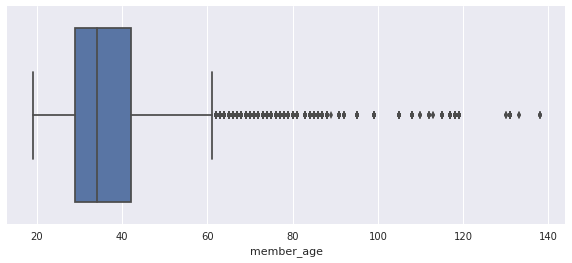

In [343]:
# code for the age boxplot

plt.figure(figsize = [10, 4])
base_color = sns.color_palette()[0]

sns.boxplot(data=df_clean, x='member_age', color=base_color);

In [344]:
df_clean.member_age.mean()

36.53289483173944

In [345]:
df_clean.member_age.describe(percentiles = [ .95])

count    2.079810e+06
mean     3.653289e+01
std      1.051074e+01
min      1.900000e+01
50%      3.400000e+01
95%      5.700000e+01
max      1.380000e+02
Name: member_age, dtype: float64

**Define**

Remove age outliers. As mentioned in the Quality issues, there are customers with the birth year before 1900 thus customers with age above 100 years. As 95% of the users are below 58 , I am going to keep users below 60.

**Code**

In [346]:
# Keep records below 60, it automatically removes null values
df_clean = df_clean.query('member_age <=60')

In [347]:
# change age and birth year to integer
df_clean.member_age = df_clean.member_age.astype(int)
df_clean.member_birth_year = df_clean.member_birth_year.astype(int)

**Test**

In [348]:
df_clean.describe()

,Unnamed: 0,duration_sec,end_station_latitude,end_station_longitude,member_birth_year,start_station_latitude,start_station_longitude,member_age,start_time_month,start_time_day,start_time_hour
count,436822.000000,2.021694e+06,2.021694e+06,2.021694e+06,2.021694e+06,2.021694e+06,2.021694e+06,2.021694e+06,2.021694e+06,2.021694e+06,2.021694e+06
mean,254931.294974,7.915458e+02,3.776762e+01,-1.223510e+02,1.983347e+03,3.776752e+01,-1.223516e+02,3.565346e+01,7.283402e+00,1.582123e+01,1.349412e+01
std,148988.491497,2.138149e+03,1.024279e-01,1.599688e-01,9.127963e+00,1.025529e-01,1.604003e-01,9.127963e+00,2.962403e+00,8.819759e+00,4.748167e+00
min,0.000000,6.100000e+01,3.726331e+01,-1.224737e+02,1.959000e+03,3.726331e+01,-1.224737e+02,1.900000e+01,1.000000e+00,1.000000e+00,0.000000e+00
25%,125832.250000,3.500000e+02,3.777143e+01,-1.224094e+02,1.978000e+03,3.777106e+01,-1.224114e+02,2.900000e+01,5.000000e+00,8.000000e+00,9.000000e+00
50%,253015.500000,5.460000e+02,3.778127e+01,-1.223971e+02,1.985000e+03,3.778107e+01,-1.223974e+02,3.400000e+01,8.000000e+00,1.600000e+01,1.400000e+01
75%,381832.750000,8.400000e+02,3.779539e+01,-1.222914e+02,1.990000e+03,3.779539e+01,-1.222914e+02,4.100000e+01,1.000000e+01,2.400000e+01,1.700000e+01
max,519699.000000,8.628100e+04,4.551000e+01,-7.357000e+01,2.000000e+03,4.551000e+01,-7.357000e+01,6.000000e+01,1.200000e+01,3.100000e+01,2.300000e+01


In [349]:
df_clean.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2021694 entries, 0 to 201457
Data columns (total 23 columns):
Unnamed: 0                 436822 non-null float64
bike_id                    2021694 non-null object
bike_share_for_all_trip    1584872 non-null category
duration_sec               2021694 non-null int64
end_station_id             2021694 non-null object
end_station_latitude       2021694 non-null float64
end_station_longitude      2021694 non-null float64
end_station_name           2010488 non-null object
end_time                   2021694 non-null datetime64[ns]
member_birth_year          2021694 non-null int64
member_gender              2021694 non-null category
start_station_id           2021694 non-null object
start_station_latitude     2021694 non-null float64
start_station_longitude    2021694 non-null float64
start_station_name         2010488 non-null object
start_time                 2021694 non-null datetime64[ns]
user_type                  2021694 non-null catego

**What is the structure of your dataset?**

Originally there were approx. 185,000 bike rides that happen in 2018 in the San Francisco Bay Area. The dataset contained features about:

    -trip duration: start/end time, how long the trip took in seconds
    -stations: start/end station, name, geolocation (latitude/longitude)
    -anonymized customer data: gender, birth date and user type
    -rented bikes: bike id
    
The dataset was further enhanced with features that I may find neccessary to perform interesting analysis:

    -rental time: month, day, hour of the day, weekday (both for start and end date)
    -customer: age
    
**What is/are the main feature(s) of interest in your dataset?**

I'm most interested in figuring out when and where bikes are high in demand (during the day/weekday/month). Moreover which age range and gender uses the service the most and if the service is mostly used by members or casual riders.

**What features in the dataset do you think will help support your investigation into your feature(s) of interest?**

I expect that the start time will be most exploited in my analysis as well as customer related data. I expect that location and datetime will have the strongest effect on bike demand.

**Part IV - Univariate Exploration**

I'll start by determine start time and end time, then looking at the monthly trend of bike rides

In [350]:
#Generate new fields for date from start_time and end_time
df['start_time']=pd.to_datetime(df['start_time'])
df['end_time']=pd.to_datetime(df['end_time'])
df['start_time_date']=df['start_time'].dt.date
df['end_time_date']=df['end_time'].dt.date
df['start_time_year_month']=df['start_time'].map(lambda x: x.strftime('%Y-%m'))
df['end_time_year_month']=df['end_time'].map(lambda x: x.strftime('%Y-%m'))
df['start_time_year_month_renamed'] = df['start_time'].dt.strftime('%y' + '-' + '%m')
df['start_time_year']=df['start_time'].dt.year.astype(int)
df['end_time_year']=df['end_time'].dt.year.astype(int)
df['start_time_month']=df['start_time'].dt.month.astype(int)
df['end_time_month']=df['end_time'].dt.month.astype(int)
df['start_time_hour_minute']=df['start_time'].map(lambda x: x.strftime('%H-%m'))
df['end_time_hour_minute']=df['end_time'].map(lambda x: x.strftime('%H-%m'))
df['start_time_hour']=df['start_time'].dt.hour
df['end_time_hour']=df['end_time'].dt.hour
df['start_time_weekday']=df['start_time'].dt.weekday_name
df['end_time_weekday']=df['end_time'].dt.weekday_name
df['start_time_weekday_abbr']=df['start_time'].dt.weekday.apply(lambda x: calendar.day_abbr[x])
df['end_time_weekday_abbr']=df['end_time'].dt.weekday.apply(lambda x: calendar.day_abbr[x])

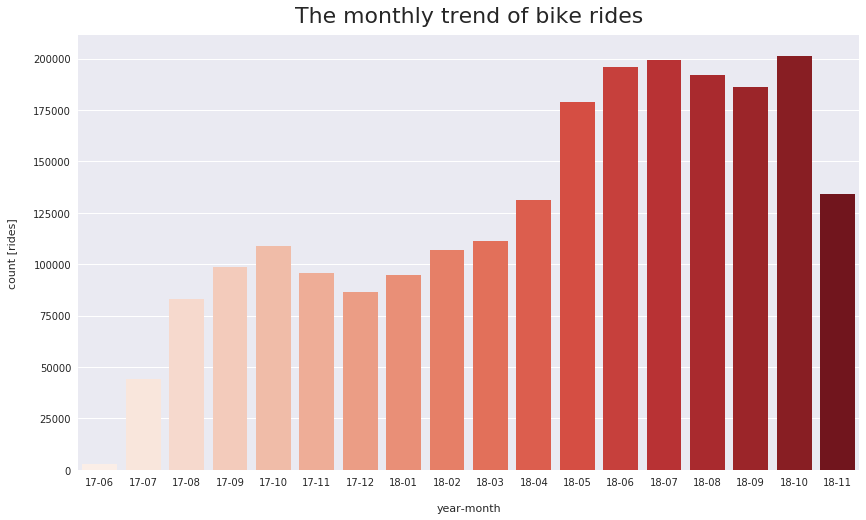

In [351]:
# monthly usege of the bike sharing system
plt.figure(figsize=(14,8))
sns.countplot(x='start_time_year_month_renamed', palette="Reds", data=df.sort_values(by='start_time_year_month_renamed'))
plt.title('The monthly trend of bike rides', fontsize=22, y=1.015)
plt.xlabel('year-month', labelpad=16)
plt.ylabel('count [rides]', labelpad=16)
ax = plt.gca()
plt.savefig('image03.png')

There is seasonality when the season is winter because it is cold. However, bike rides of July 2017 and 2018 increased more than 5 times.



Winter months are the worst for the bike sharing system most probably due to the weather conditions. The bike renting is high in demand between May and October, reaching its peak in October, followed by July.

**Bike rides per weekday**

Determine precentage trend of bike rides per weekday

In [352]:
# weekday usege of the bike

trip_by_weekday_df = df.groupby('start_time_weekday_abbr').agg({'bike_id':'count'})

In [353]:
trip_by_weekday_df['perc'] = (trip_by_weekday_df['bike_id']/trip_by_weekday_df['bike_id'].sum())*100

In [354]:
weekday_index = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

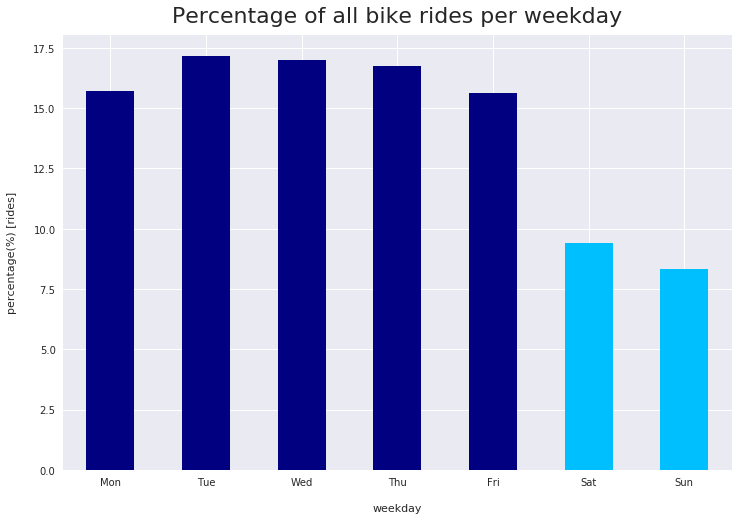

In [355]:
new_color = ['navy', 'navy', 'navy', 'navy', 'navy', 'deepskyblue', 'deepskyblue']
trip_by_weekday_df.reindex(weekday_index)['perc'].plot(kind='bar', color=new_color, figsize=(12,8), legend=False)
plt.title('Percentage of all bike rides per weekday', fontsize=22, y=1.015)
plt.xlabel('weekday', labelpad=16)
plt.ylabel('percentage(%) [rides]', labelpad=16)
plt.xticks(rotation=360)
plt.savefig('image07.png');

The bike share system is mainly used during weekdays, with Tuesday - Thursday as the most popular days for bike rides. The system is most probably used as a daily work/school commute.

People use this service on weekdays more than weekends.

**Bike rides hourly**

Determine precentage trend of bike rides per hour of the day

In [356]:
# hourly usege of the bike sharing system

trip_by_hour_df = df.groupby('start_time_hour').agg({'bike_id':'count'}).reset_index()

In [357]:
trip_by_hour_df['bike_id'] = (trip_by_hour_df['bike_id']/trip_by_hour_df['bike_id'].sum())*100

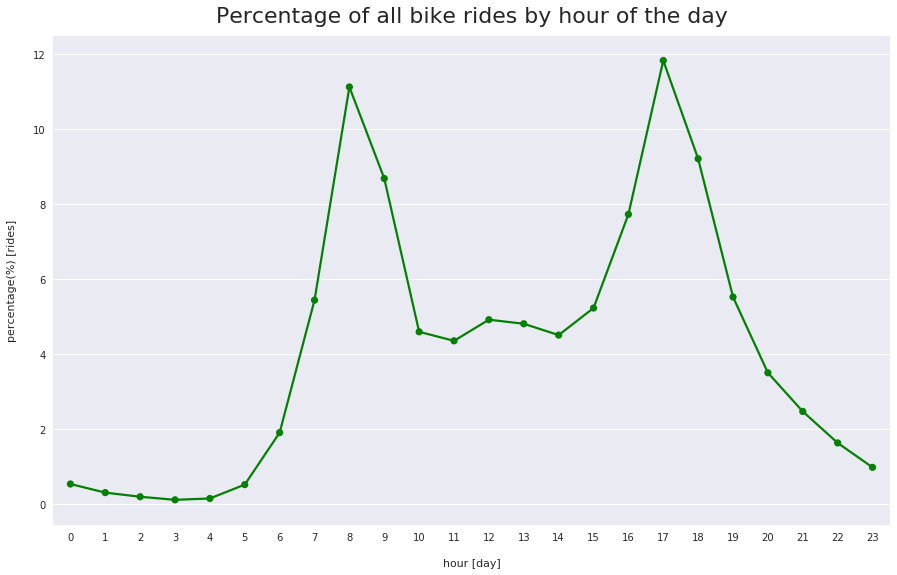

In [358]:
plt.figure(figsize=(15,9))
sns.pointplot(x='start_time_hour', y='bike_id', scale=.7, color='green', data=trip_by_hour_df)
plt.title('Percentage of all bike rides by hour of the day', fontsize=22, y=1.015)
plt.xlabel('hour [day]', labelpad=16)
plt.ylabel('percentage(%) [rides]', labelpad=16)
plt.savefig('image08.png');

The hourly distribution is bimodal, the system is used mainly around 8-9am and 5-6pm when people get to and gat back from work.

8am and 5pm are the peak hours for this service. Also, people use this service when they are in lunch time as well.

**Trip duration**

Determine trip duration by second

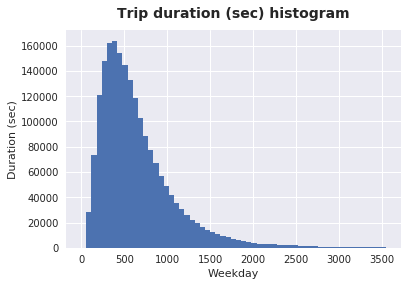

In [359]:
# code for the (histogram) duration (sec) distribution per user type

bin_edges = np.arange(0, 3600,60)

plt.hist(data = df_clean, x = 'duration_sec', bins = bin_edges)

plt.title("Trip duration (sec) histogram", y=1.03, fontsize=14, fontweight='semibold')
plt.xlabel('Weekday')
plt.ylabel('Duration (sec)');

**Looking at the histogram, we can see that trip durations are no longer than 30 min (1800 sec) and usually last 6 to 15 min. This can be explained by two facts:**

1.The way the system works: single trips and 24h or 72h access pass are free of additional charge for trips up to 30 min, otherwise you pay extra $3 for additional 15 min. Only the monthly pass offers free of charge 45 min rides.

2.The way the system is used: as is looks like people use the system for commuting, they trips are usually short in time probably due to the closeness of their homes to workplace/school.

**Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?**

There was one unusal points for the duration (sec), which in some cases lasted more than 24h. For the histogram I set the max range to 3600 sec = 60 min.

**Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?**

There was one unusal distribution for the member birth year, which in some cases was dated before 1900. Since 95% of the members are between 17 and 57 years, I removed users older than 60.

# Part V - Bivariate Exploration

In this section I will further explore the dataset by adding the customer type to the analysis.

In [360]:
# calculating % split for the user type
customer = df_clean.query('user_type == "Customer"')['bike_id'].count()
subscriber = df_clean.query('user_type == "Subscriber"')['bike_id'].count()

customer_proportion = customer / df_clean['bike_id'].count()
subscriber_proportion = subscriber / df_clean['bike_id'].count()

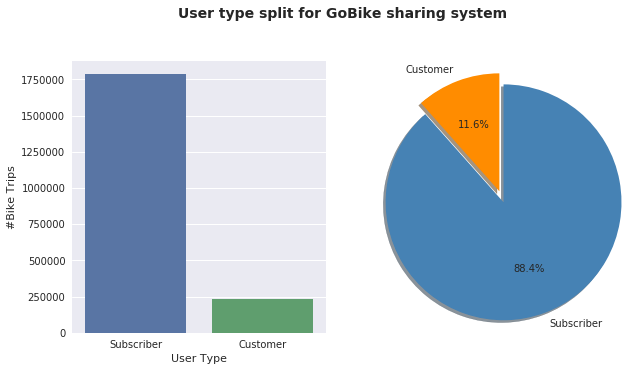

In [361]:
plt.figure(figsize = [10, 5])

# code for the bar chart
plt.subplot(1, 2, 1)

g = sns.countplot(data=df_clean, x="user_type", order=df_clean.user_type.value_counts().index)
g.set_xlabel('User Type')
g.set_ylabel('#Bike Trips')

# code for the pie chart
plt.subplot(1, 2, 2)

labels = ['Customer', 'Subscriber']
sizes = [customer_proportion, subscriber_proportion]
colors = ['darkorange', 'steelblue']
explode = (0, 0.1)

plt.pie(sizes, explode=explode, labels=labels, colors = colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')

plt.suptitle('User type split for GoBike sharing system', y=1.03, fontsize=14, fontweight='semibold');

The bike sharing system is mainly used by subscribers (88%) than ocassional riders (12%). 

Next I will see the monthly trend of bike rides

In [362]:
# monthly usege of the bike sharing system per user type

user_type_count_per_year_df = df.groupby(["start_time_year_month_renamed", "user_type"]).size().reset_index()

In [363]:
# weekday usege of the bike sharing system per user type

count_of_rides_per_user_type = df.groupby('user_type').size().reset_index(name='count')
count_of_rides_per_user_type['count']/len(df)*100

0    16.588649
1    83.411351
Name: count, dtype: float64

Percentage of subscribers is almost %88.15.

Percentage of customers is almost %11.85.

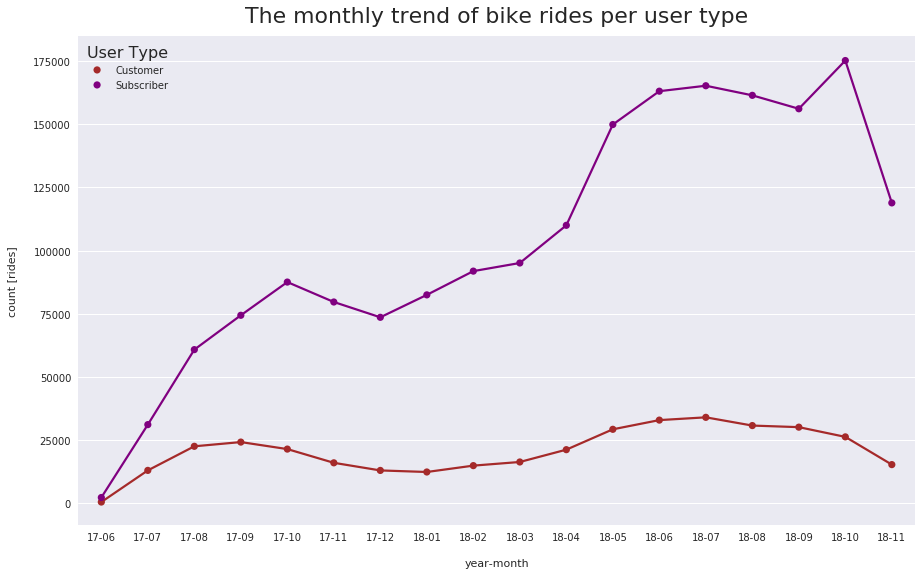

In [364]:
plt.figure(figsize=(15,9))
my_palette = {'Subscriber':'purple', 'Customer':'brown'}
ax = sns.pointplot(x='start_time_year_month_renamed', y=0, hue='user_type', palette=my_palette, scale=.7, data=user_type_count_per_year_df)
plt.title('The monthly trend of bike rides per user type', fontsize=22, y=1.015)
plt.xlabel('year-month', labelpad=16)
plt.ylabel('count [rides]', labelpad=16)
leg = ax.legend()
leg.set_title('User Type',prop={'size':16})
ax = plt.gca()
plt.savefig('image09.png');

Customers' rides seems increasing slightly. There is a decrease on November 2018 for subscribers but it seems like it is related with winter season.

Winter months are the worst for the bike sharing system for both groups what can be determined by the harsher weather. 

For Customers, the bike renting is high in demand around summertime, reaching its peak in July. Customers are most probably occasional reiders or tourist coming to visit the Bay Area. For Subscribers, the highest demand is from May till October, reaching it's peak in October. Customers are most probably regular riders using bikes for a daily commute.

There is also a different trend of when during the day bikes are rented most often. Customers use bikes mainly between 8 am - 7 pm, reaching the renting peak around 5pm. Subscribers on the other side use the system at around 8-9am and 5-6pm when they go and come back from work. 

Next, I am going to check how the trip duration varies between customers and subscribers.

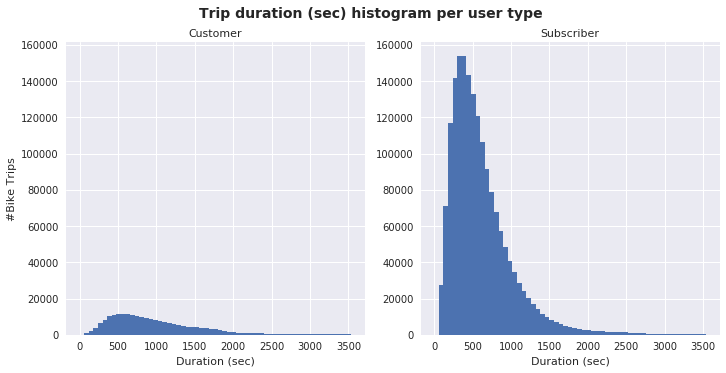

In [365]:
# code for the (histogram) duration (sec) distribution per user type

g = sns.FacetGrid(df_clean, col="user_type", margin_titles=True, size=5)
bin_edges = np.arange(0, 3600,60)
g.map(plt.hist, "duration_sec", color=base_color, bins=bin_edges)
g.set_axis_labels("Duration (sec)", "#Bike Trips")
g.set_titles(col_template = '{col_name}')
g.fig.suptitle('Trip duration (sec) histogram per user type', y=1.03, fontsize=14, fontweight='semibold');

Looking at both charts (histograms and box plots), we can see that trip durations are longer for customers (9 to 23 minutes) than for subscribers (7 to 13 minutes). This can probably be explained by the fact that subscribers are mainly commuters who take short trips to work/school rather than longer trips around the Bay Area.

**Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?**

Adding the user type to the analysis depicted different usage behaviours between customers and subscribers. As mentioned above customers are casual riders, most probably tourists who rent bikes mainly in summertime (the peak in July), more often during weekends than weekdays and they rent bikes more often within the day rather than around commute hours (8-9am and 5-6pm). Subscribers are daily commuters, who also use the system around summertime, May-October (with the peak in October). They rent bikes more often during weekdays than weekends and mainly around the time they go and go back from work or school (8-9am and 5-6pm).

**Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?**

There is a difference in the trip duration between customers and subscribers. Customers trips are usually longer than for subscribers, most probably due to the fact they prefer bike rides around weekends in summertime, what encourages longer trips around the area. Subscribers on the other hand use the system mainly for commute purposes so they rather prefer quick rides to and from work/school.

# Part VI - Multivariate Exploration

In this section I will further explore the dataset by adding gender to the customer type and check the hourly distribution of bike rides during weekdays for customers and subscribers.

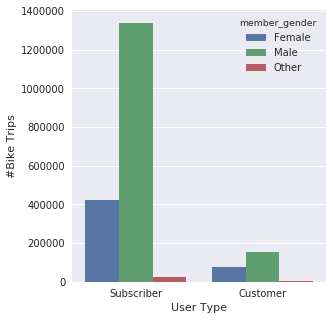

In [366]:
plt.figure(figsize = [10, 5])

# code for the bar chart
plt.subplot(1, 2, 1)

g = sns.countplot(data=df_clean, x="user_type", hue="member_gender", order=df_clean.user_type.value_counts().index)
g.set_xlabel('User Type')
g.set_ylabel('#Bike Trips');

In general, males are using the system more often than females and others (the registration system allows you to choose 'Other' as a gender). However, the ratio is much smaller between males and females for customers (more ore less 2:1) than for subscribers (3:1). 

Let's explore if gender affects the way the bike system is used within a year, weekdays and hours of the day.

Here we can observe that in both cases, females take longer trips (measured in time) than males and other. The difference is more visible for customers (~13 min for males and other vs ~15 for females) than for subscribers (the difference is quite small).

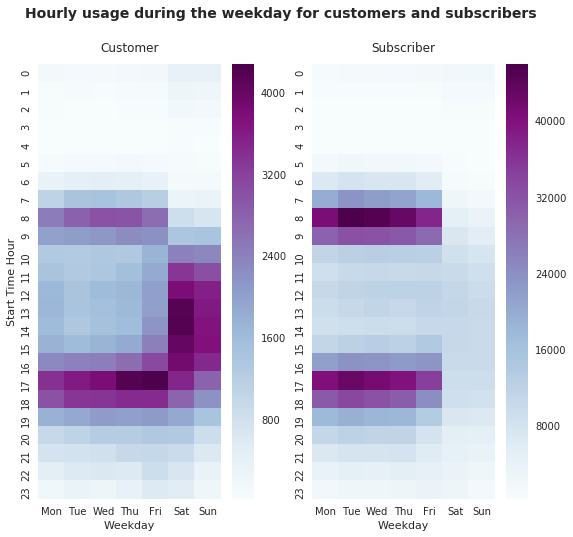

In [367]:
# Setting the weekday order
df_clean['start_time_weekday'] = pd.Categorical(df_clean['start_time_weekday'], 
                                                categories=['Mon','Tue','Wed','Thu','Fri','Sat', 'Sun'], 
                                                ordered=True)
plt.figure(figsize=(9,8))
plt.suptitle('Hourly usage during the weekday for customers and subscribers', fontsize=14, fontweight='semibold')

# heatmap for customers
plt.subplot(1, 2, 1)
df_customer = df_clean.query('user_type == "Customer"').groupby(["start_time_hour", "start_time_weekday"])["bike_id"].size().reset_index()
df_customer = df_customer.pivot("start_time_hour", "start_time_weekday", "bike_id")
sns.heatmap(df_customer, cmap="BuPu")

plt.title("Customer", y=1.015)
plt.xlabel('Weekday')
plt.ylabel('Start Time Hour')

# heatmap for subscribers
plt.subplot(1, 2, 2)
df_subscriber = df_clean.query('user_type == "Subscriber"').groupby(["start_time_hour", "start_time_weekday"])["bike_id"].size().reset_index()
df_subscriber = df_subscriber.pivot("start_time_hour", "start_time_weekday", "bike_id")
sns.heatmap(df_subscriber, cmap="BuPu")

plt.title("Subscriber", y=1.015)
plt.xlabel('Weekday')
plt.ylabel('');

The plot perfectly summarizes in one place the diffrent trends for customers and subscribers I was writing up before. 

**Customers use the bike sharing system more often on weekends:**

    weekdays: most bike rides hapen around 8-9am and 5-6pm with the peak on Fridays around 5pm
    weekends: most bike rides happen between 10am - 8pm with the peak on Saturdays around 2pm
    
**Subscribers use the bike sharing system mainly on weekdays:**

    weekdays: most bike rides hapen around 8-9am and 5-6pm with the peak on Tuesdays around 8am
    weekends: bikes are still rented but there is a significant drop in numbers of rented bikes throughout the entire weekends

**Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?**

Plotting a heatmap of when bikes are high in demand throughout the day on each weekday shed a new light on the customers behaviour. Plotting #bike trips throughout the day and #bike trips within the weekdays separately gave the impression that the demand for bikes is quite high throughout the day with a peak around 5pm which is not entirely true. The trend within weekdays for customers follows (although customers are rather not early birds) the one for subscribers who rent bikes mainly around commute hours (8-9am and 5-6pm). For customers, as depicted in univariate explorations, most of the trips happen on weekends but mainly between 10am - 8pm with the peak on Saturdays around 2pm, what was previosly not visible.

**Were there any interesting or surprising interactions between features?**

I have also checked if there is a trend difference for genders for each user group. There are not much of the differences in trends but surprisingly there are quite a lot of females using the system between January and March in comparison to males - the ratio (male:female) is much smaller than for the rest of the year. Moreover females take longer trips (measured in time) than males and others.